This notebook gives an example of linear regression usage.
The formulation of problem is the following:

We have a dataset $X\in R^{nxd}$ where $n$ is a number of samples and $d$ number of features, and $Y\in R^{nxl}$ target data with $l$ number of features, find $W\in R^{dxl}$ for which $$\|XW - Y\|$$ takes the minimum value, where $\|\cdot\|$ means sum of squares of all entries.

For a tutorial and implementation using sklearn library see e.g. [here](https://realpython.com/linear-regression-in-python/).

In [2]:
import numpy as np

In [3]:
def lin_reg_coefs(x, y):
    '''
    x: input data, need to append column of 1s for bias
    y: target data
    '''
    # compute pseudoinverse using np.linalg
    x_pse = np.linalg.pinv(x)
    w = np.dot(x_pse, y)
    #another extended formula w = np.dot(np.linalg.inv(np.dot(x.T, x)), y)
    return w


def lin_reg_l2(x, y, w):
    '''
    x: input data
    y: target data
    w: given parameters
    '''
    y_pred = np.dot(x, w)
    # mean square error
    return np.sqrt(np.mean((y_pred - y) ** 2))

Now let's test the functions

In [4]:

x = np.random.rand(10, 5)
# y = np.random.rand(10, 8)
w_0 = np.arange(5)
y = np.dot(x, w_0)
w = lin_reg_coefs(x, y)
print(w, w.shape)


[5.99520433e-15 1.00000000e+00 2.00000000e+00 3.00000000e+00
 4.00000000e+00] (5,)


In [5]:
error = lin_reg_l2(x, y, w)
print(error)

1.5653750946155902e-15


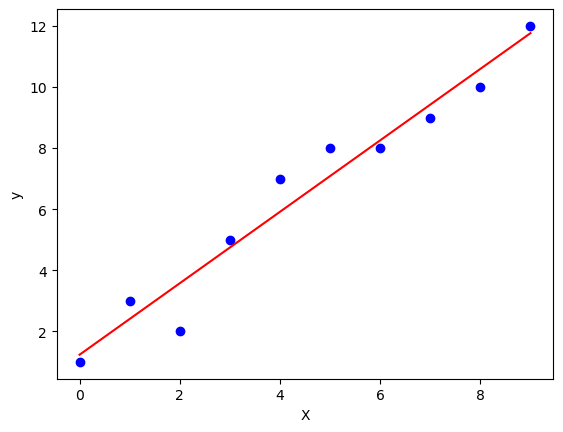

In [6]:
# Some plots
import matplotlib.pyplot as plt


def plot_linear_regression(X, y, y_pred):
    plt.scatter(X, y, color='blue')
    plt.plot(X, y_pred, color='red')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()


# Example usage:
X = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

# Calculate the parameters of the linear regression model
w = np.polyfit(X, y, 1)[0]
b = np.polyfit(X, y, 1)[1]

# Calculate the predicted values
y_pred = w * X + b

# Plot the result
plot_linear_regression(X, y, y_pred)

As an exercises:

1. Implement the above functions using numpy.sklearn library
2. Write a function which will return best n-th order polynomial coefficients for a given $(x_i,y_i), i=0,1,...,n+1$ in terms of mean square error, i.e. $$\sum_{i}\big[y_i - P(x_i)\big]^2$$ where $P$ is the required polynomial

In [7]:
from sklearn.linear_model import LinearRegression


def lin_reg_coefs_sklearn(x, y):
    '''
    x: input data
    y: target data
    '''
    reg = LinearRegression().fit(x, y)
    return reg.coef_


def lin_reg_l2_sklearn(x, y, w):
    '''
    x: input data
    y: target data
    w: given parameters
    '''
    reg = LinearRegression().fit(x, y)
    y_pred = reg.predict(x)
    # mean square error
    return np.sqrt(np.mean((y_pred - y) ** 2))

In [9]:
x = np.random.rand(10, 15)
w_0 = np.arange(15)
y = np.dot(x, w_0)

w_sklearn = lin_reg_coefs_sklearn(x, y)
print(w_sklearn, w_sklearn.shape)

error_sklearn = lin_reg_l2_sklearn(x, y, w_sklearn)
print(error_sklearn)

[-8.07237045  1.27993741  5.57414416  5.17857787  6.64768767  4.9980538
 -5.31342121  3.90877773 -0.63452639  0.91144478  2.68425017  1.74088193
  6.62477183  7.47220467  5.89695556] (15,)
5.944827041546401e-15


In [10]:
def best_polynomial_coefficients(x, y, n):
    '''
    x: input data
    y: target data
    n: degree of the polynomial
    '''
    coefficients = np.polyfit(x, y, n)
    return coefficients


# Example usage:
X = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
n = 3  # degree of the polynomial

coefficients = best_polynomial_coefficients(X, y, n)
print("Coefficients of the best polynomial:", coefficients)

Coefficients of the best polynomial: [ 0.0027195  -0.05944056  1.4996115   0.8951049 ]
